In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv('../data/clean/2015to2019.csv')
df.sample(7)

,Country,Region,GDP per capita,Social support,Life Expectancy,Freedom,Trust,Generosity,Happiness Rank,Happiness Score,year
306,Tanzania,Sub-Saharan Africa,0.471550,0.776230,0.357000,0.317600,0.050990,0.314720,149,3.666,2016
578,Senegal,Sub-Saharan Africa,0.429000,1.117000,0.433000,0.406000,0.082000,0.138000,109,4.631,2018
311,Afghanistan,Southern Asia,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,154,3.360,2016
530,Cyprus,Western Europe,1.229000,1.191000,0.909000,0.423000,0.035000,0.202000,61,5.762,2018
773,Botswana,Sub-Saharan Africa,1.041000,1.145000,0.538000,0.455000,0.100000,0.025000,148,3.488,2019
403,Portugal,Western Europe,1.315175,1.367043,0.795844,0.498465,0.015869,0.095103,89,5.195,2017
575,Iran,Middle East and Northern Africa,1.059000,0.771000,0.691000,0.459000,0.129000,0.282000,106,4.707,2018


In [5]:
df.shape

(782, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          782 non-null    object 
 1   Region           782 non-null    object 
 2   GDP per capita   782 non-null    float64
 3   Social support   782 non-null    float64
 4   Life Expectancy  782 non-null    float64
 5   Freedom          782 non-null    float64
 6   Trust            782 non-null    float64
 7   Generosity       782 non-null    float64
 8   Happiness Rank   782 non-null    int64  
 9   Happiness Score  782 non-null    float64
 10  year             782 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 67.3+ KB


In [7]:
df.describe()

,GDP per capita,Social support,Life Expectancy,Freedom,Trust,Generosity,Happiness Rank,Happiness Score,year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,0.916047,1.078392,0.612416,0.411091,0.125418,0.218576,78.698210,5.379018,2016.993606
std,0.407340,0.329548,0.248309,0.152880,0.105750,0.122321,45.182384,1.127456,1.417364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.693000,2015.000000
25%,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000,40.000000,4.509750,2016.000000
50%,0.982205,1.124735,0.647310,0.431000,0.091033,0.201982,79.000000,5.322000,2017.000000
75%,1.236187,1.327250,0.808000,0.531000,0.155861,0.278832,118.000000,6.189500,2018.000000
max,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,158.000000,7.769000,2019.000000


In [15]:
# Dropping columns needed for visualization in Tableau

df = df.drop(['year', 'Happiness Rank'], axis=1)

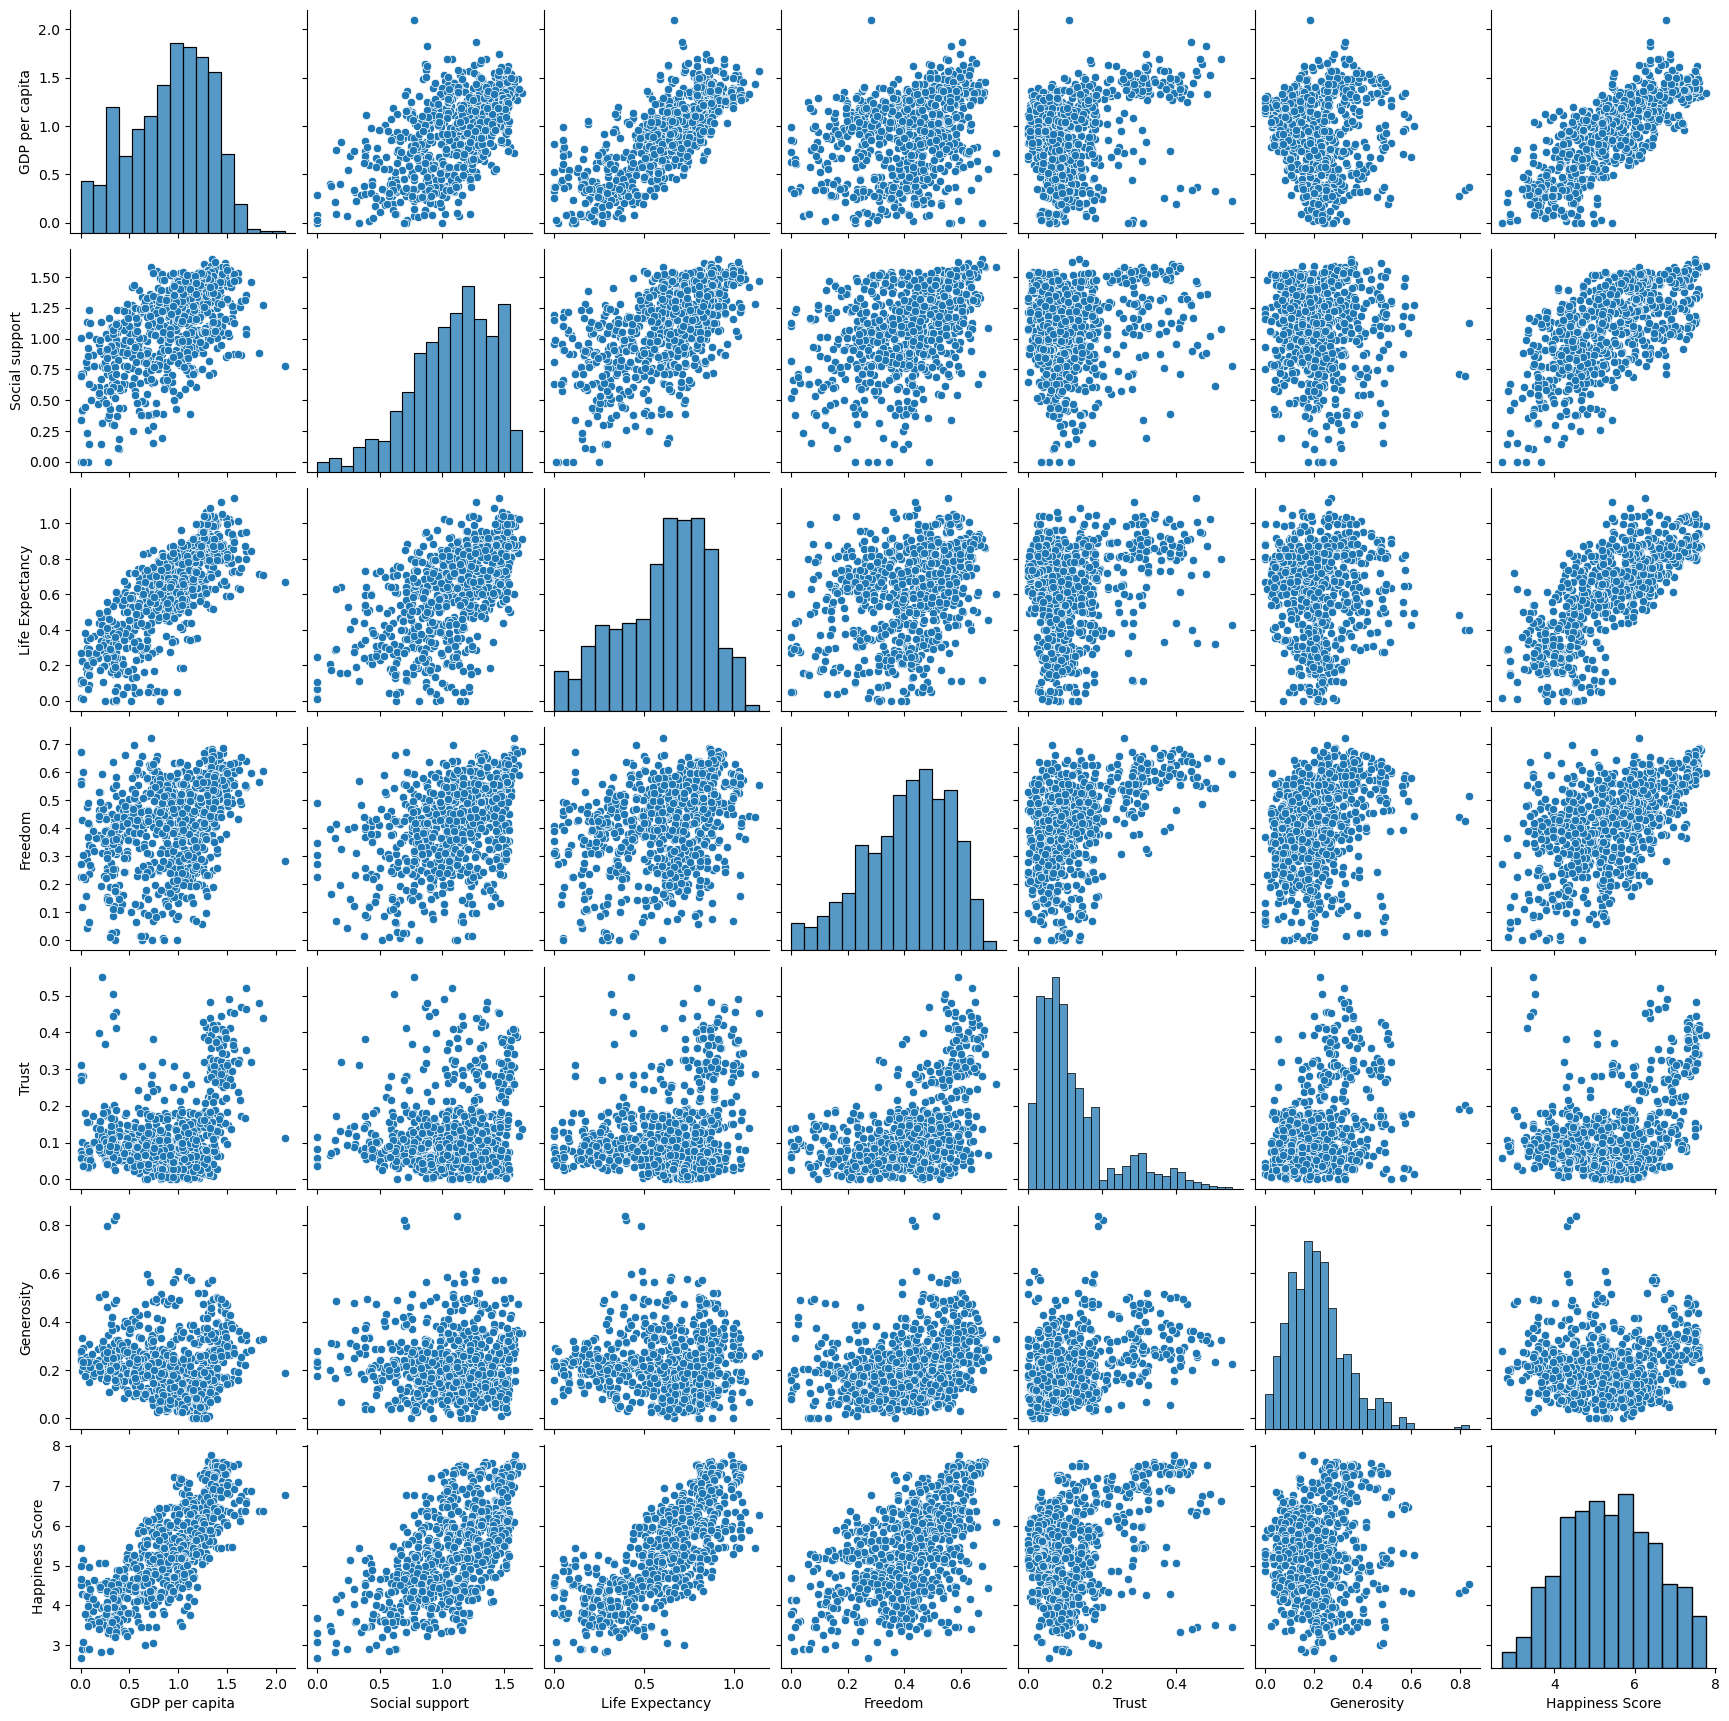

In [20]:
sns.pairplot(data=df)
plt.show()

In [16]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,GDP per capita,Social support,Life Expectancy,Freedom,Trust,Generosity,Happiness Score
GDP per capita,1.000000,0.585966,0.784338,0.340511,0.304181,-0.014560,0.789284
Social support,0.585966,1.000000,0.572650,0.420361,0.126481,-0.037262,0.648799
Life Expectancy,0.784338,0.572650,1.000000,0.340745,0.250463,0.010638,0.742456
Freedom,0.340511,0.420361,0.340745,1.000000,0.459520,0.290706,0.551258
Trust,0.304181,0.126481,0.250463,0.459520,1.000000,0.318945,0.397821
Generosity,-0.014560,-0.037262,0.010638,0.290706,0.318945,1.000000,0.137578
Happiness Score,0.789284,0.648799,0.742456,0.551258,0.397821,0.137578,1.000000


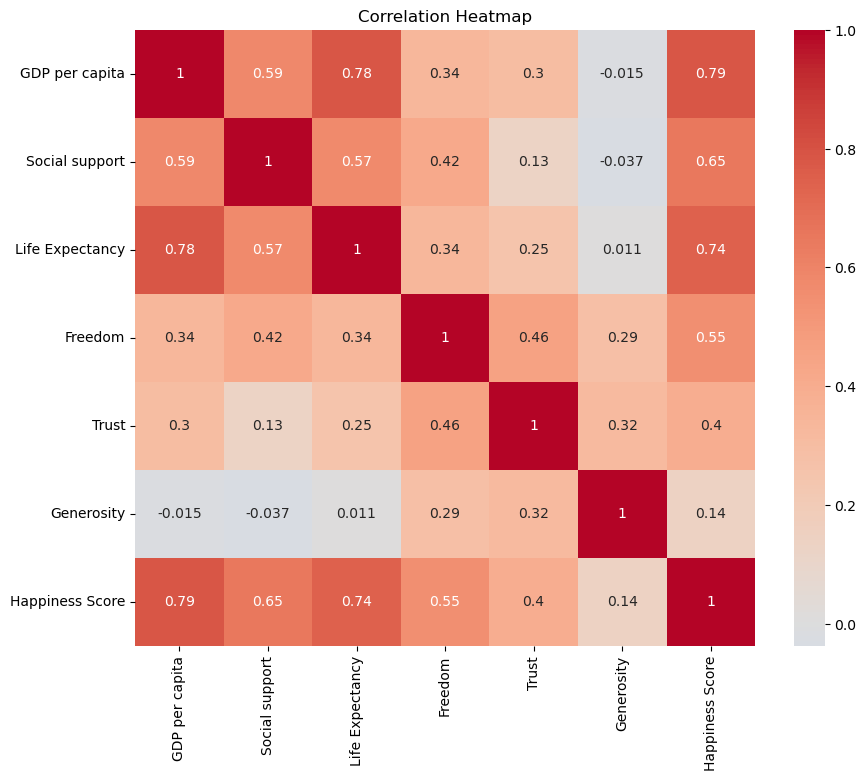

In [17]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
# plt.savefig('../images/heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Statistical Modelling

In [56]:
y = df['Happiness Score']
X = df[['GDP per capita', 'Social support', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept
X.head()

,const,GDP per capita,Social support,Life Expectancy,Freedom,Trust,Generosity
0,1.0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.0,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.0,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.0,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.0,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [57]:
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     418.2
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          4.25e-239
Time:                        19:12:04   Log-Likelihood:                -638.30
No. Observations:                 782   AIC:                             1291.
Df Residuals:                     775   BIC:                             1323.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.1775      0.080     

<Axes: ylabel='Count'>

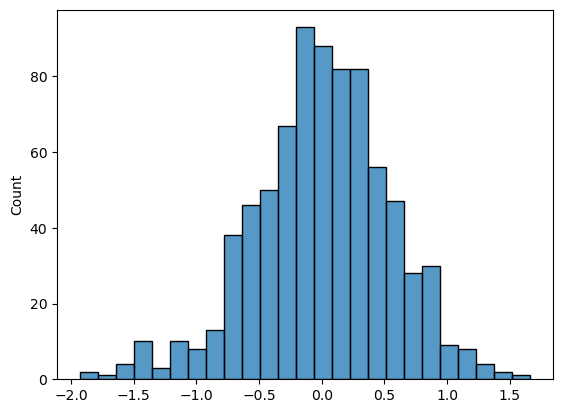

In [58]:
residuals = results.resid
sns.histplot(residuals)

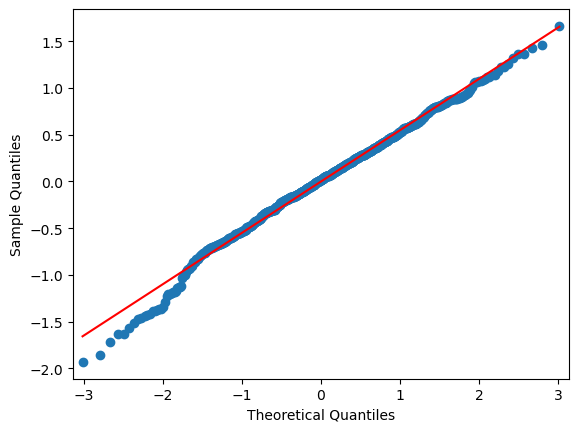

In [59]:
sm.qqplot(residuals, line='r')
plt.show()

In [62]:
y = df['Happiness Score']
X = df[['GDP per capita', 'Life Expectancy', 'Freedom']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept
X.head()

,const,GDP per capita,Life Expectancy,Freedom
0,1.0,1.39651,0.94143,0.66557
1,1.0,1.30232,0.94784,0.62877
2,1.0,1.32548,0.87464,0.64938
3,1.0,1.45900,0.88521,0.66973
4,1.0,1.32629,0.90563,0.63297


In [63]:
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     736.5
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          9.69e-227
Time:                        19:13:52   Log-Likelihood:                -676.86
No. Observations:                 782   AIC:                             1362.
Df Residuals:                     778   BIC:                             1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.5237      0.068     

<Axes: ylabel='Count'>

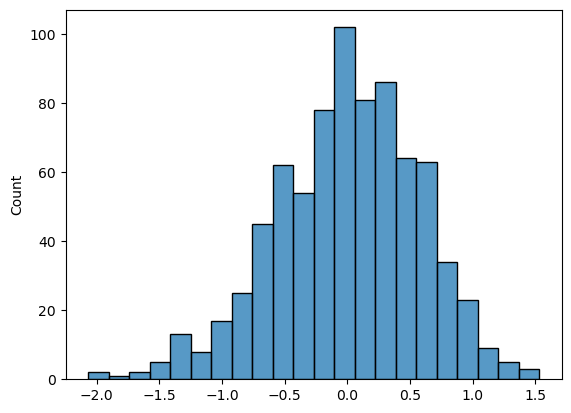

In [64]:
residuals = results.resid
sns.histplot(residuals)

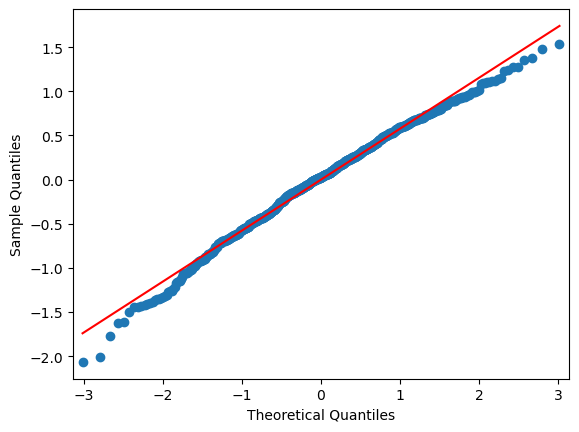

In [65]:
sm.qqplot(residuals, line='r')
plt.show()

In [74]:
y = df['Happiness Score']
X = df[['GDP per capita']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept
X.head()

,const,GDP per capita
0,1.0,1.39651
1,1.0,1.30232
2,1.0,1.32548
3,1.0,1.45900
4,1.0,1.32629


In [75]:
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     1289.
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          2.21e-167
Time:                        19:18:22   Log-Likelihood:                -821.53
No. Observations:                 782   AIC:                             1647.
Df Residuals:                     780   BIC:                             1656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3778      0.061     55.

<Axes: ylabel='Count'>

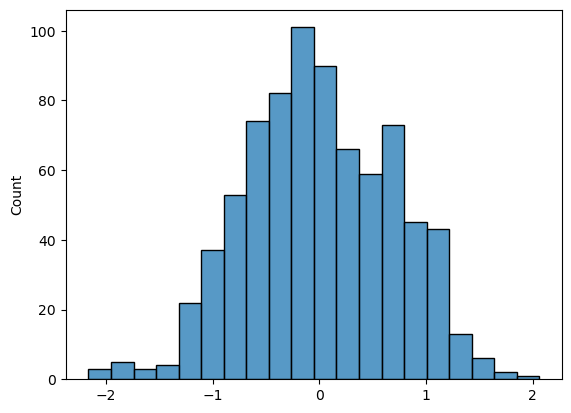

In [76]:
residuals = results.resid
sns.histplot(residuals)

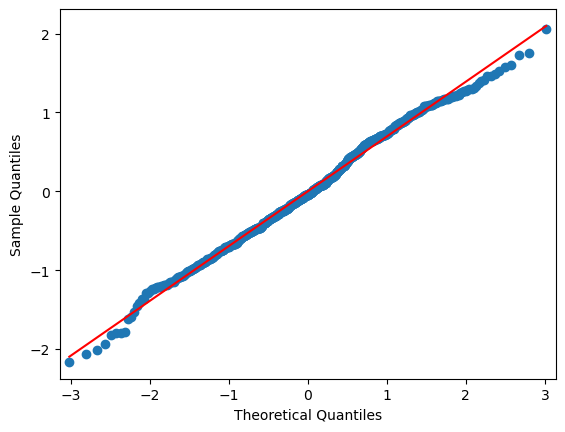

In [77]:
sm.qqplot(residuals, line='r')
plt.show()